# t-SNE with MNIST data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MNIST dataset
from tensorflow.keras.datasets import mnist

In [46]:
# Load Data
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select a subset of the data
target_indices = []
for i in range(10):
    target_indices.extend(np.where(y_train == i)[0][:1000])
X_train = X_train[target_indices]
y_train = y_train[target_indices]


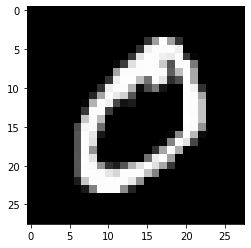

In [47]:
# Plot the first one
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.show()

In [48]:
# Flatten X
X_train = X_train.reshape(X_train.shape[0], -1)

In [49]:
from sklearn.manifold import TSNE

# tSNE
tSNE = TSNE(n_components=2, perplexity=30, random_state=0)
tSNE.fit_transform(X_train)

/Users/dangchan/miniforge3/envs/atf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dangchan/miniforge3/envs/atf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 45.24092  , -56.26842  ],
       [ 45.663147 , -56.536503 ],
       [ 43.48491  , -43.300407 ],
       ...,
       [-37.337353 ,  21.818098 ],
       [-44.24982  ,  -1.8828827],
       [-46.556164 ,  10.423439 ]], dtype=float32)

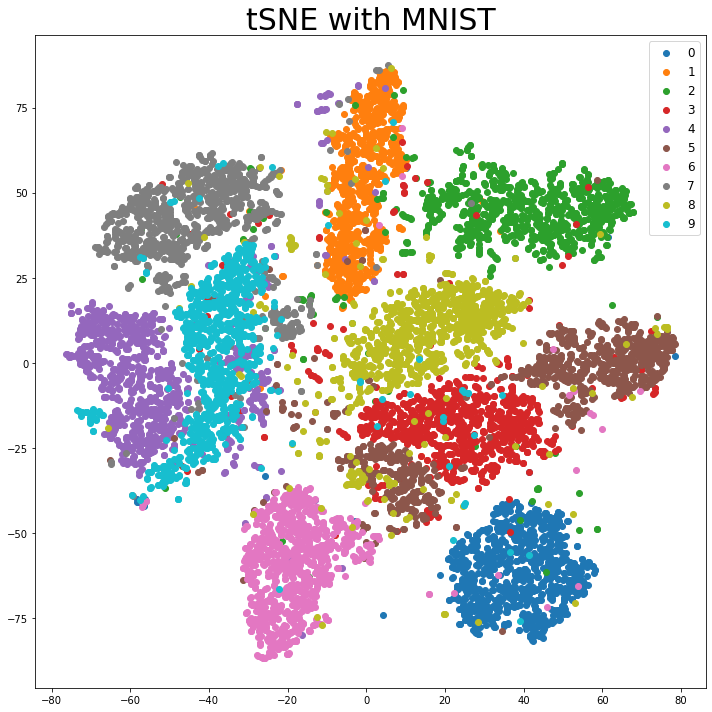

In [51]:
# Plot with legend
df = pd.DataFrame()
df['x'] = tSNE.embedding_[:,0]
df['y'] = tSNE.embedding_[:,1]
df['label'] = y_train

plt.figure(figsize=(10,10))
for i in range(10):
    plt.scatter(df[df['label']==i]['x'], df[df['label']==i]['y'], label=i)
plt.legend(fontsize = 12)
plt.title('tSNE with MNIST', fontsize=30)
plt.tight_layout()
plt.savefig('tSNE.png', facecolor='white')